In [31]:
# Programming-Poetry-Project
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# File Location
Poetry_Analysis = "Resources/Poetry_Analysis_Data.csv"

# Read Poetry Analysis Data File As A Pandas Dataframe
Poetry_Analysis_df = pd.read_csv(Poetry_Analysis)
Poetry_Analysis_df.head(5)

,author,content,poem name,age,type,Gender
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\nOn the sole Arabi...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore,Male
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\nWhen I...",An Epilogue to the Above,Renaissance,Mythology & Folklore,Female
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\nAn...","Book 7, Epigram 42",Renaissance,Mythology & Folklore,Male
3,EDMUND SPENSER,"Lo I the man, whose Muse whilome did maske,\nA...","from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore,Male
4,RICHARD BARNFIELD,"Long have I longd to see my love againe,\nStil...",Sonnet 16,Renaissance,Mythology & Folklore,Male


In [32]:
# Total Genre per Age – Stacked Column Chart (Bilal)
# Create a table with the Age and Genre Type
genre_per_age = Poetry_Analysis_df.groupby(['age', 'type'])['type'].count().unstack()
genre_per_age

type,Love,Mythology & Folklore,Nature
age,,,
Modern,83,40,135
Renaissance,243,19,53


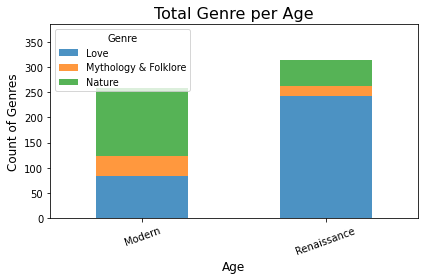

In [33]:
# Create a Stacked Column Chart with the table created with groupby from above
genre_per_age.plot(kind='bar', stacked=True, rot=20, alpha=0.8)
plt.title("Total Genre per Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count of Genres", fontsize=12)
plt.legend(loc="upper left", title = "Genre", fontsize=9.6)
plt.ylim(0, 385)

# Save the graph to the images folder
plt.tight_layout()
plt.savefig("Images/genre_per_age.png")
plt.show()

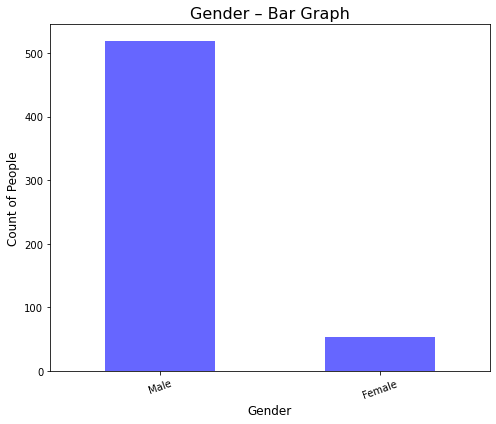

Number of rows present: 573


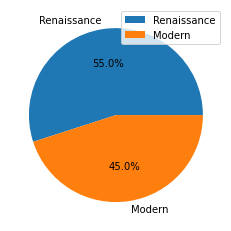

In [34]:
# Gender – Bar Graph (Bilal)

# Create a bar graph from the "Gender" column in the dataframe
Poetry_Analysis_df['Gender'].value_counts().plot(kind='bar', figsize=(7, 6), rot=20, color='b', alpha=0.6)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count of People", fontsize=12)
plt.title("Gender – Bar Graph", fontsize=16)

# Save the graph to the images folder
plt.tight_layout()
plt.savefig("Images/gender.png")
plt.show()

row_count = print("Number of rows present:", 
      len(Poetry_Analysis_df['Gender']))
Poetry_Analysis_df['Gender'].value_counts()
age_distribution = Poetry_Analysis_df["age"].value_counts()
plt.pie(age_distribution, autopct = "%1.1f%%", labels=age_distribution.index)
plt.legend()
plt.show()


### Length of Poems by Genre

In [35]:
#Used to split strings with multiple delimiters
import re

#Make a dictionary to contain poem name, word count, and list of words for each poem
poem_dict = {}
index = 0

#Iterates through each poem by name
for poem in Poetry_Analysis_df["poem name"]:
    
    #Temporary dictionary that stores poem name, word count, and split content
    word_count_dict = {}
    
    #splits the string in the "content" column based on multiple delimiters and removes empty strings
    word_list = re.split(',|\n|;| |:|\.', Poetry_Analysis_df["content"][index])
    word_list = [word for word in word_list if word != ""]
    
    word_count_dict["poem name"] = poem
    word_count_dict["word count"] = len(word_list)
    word_count_dict["split content"] = word_list
    
    #adds poem to the poem dictionary
    poem_dict[index] = word_count_dict
    index += 1

In [36]:
#Creates series to add to the dataframe
word_count_series = []
split_content_series = []

#Adds elements to each respective series
for key in poem_dict.keys():
    word_count_series.append(poem_dict[key]["word count"])
    split_content_series.append(poem_dict[key]["split content"])

#Adds new columns to the dataframe for word count and split content
Poetry_Analysis_df["word count"] = word_count_series
Poetry_Analysis_df["split content"] = split_content_series

In [37]:
# creates a new dataframe with only the columns of interest
word_count_df = Poetry_Analysis_df[["poem name", "content", "type", "word count", "split content"]]
word_count_df

,poem name,content,type,word count,split content
0,The Phoenix and the Turtle,Let the bird of loudest lay\nOn the sole Arabi...,Mythology & Folklore,354,"[Let, the, bird, of, loudest, lay, On, the, so..."
1,An Epilogue to the Above,"Sir Charles into my chamber coming in,\nWhen I...",Mythology & Folklore,109,"[Sir, Charles, into, my, chamber, coming, in, ..."
2,"Book 7, Epigram 42","Our vice runs beyond all that old men saw,\nAn...",Mythology & Folklore,59,"[Our, vice, runs, beyond, all, that, old, men,..."
3,"from The Faerie Queene: Book I, Canto I","Lo I the man, whose Muse whilome did maske,\nA...",Mythology & Folklore,4344,"[Lo, I, the, man, whose, Muse, whilome, did, m..."
4,Sonnet 16,"Long have I longd to see my love againe,\nStil...",Mythology & Folklore,116,"[Long, have, I, longd, to, see, my, love, agai..."
...,...,...,...,...,...
568,Union Square,"With the man I love who loves me not,\nI walke...",Love,146,"[With, the, man, I, love, who, loves, me, not,..."
569,Voyages,"Hart Crane, ""Voyages I, II, III, IV, V, VI"" fr...",Love,39,"[Hart, Crane, ""Voyages, I, II, III, IV, V, VI""..."
570,When You Are Old,"When you are old and grey and full of sleep,\n...",Love,100,"[When, you, are, old, and, grey, and, full, of..."
571,At a Window,"Give me hunger,\nO you gods that sit and give\...",Love,112,"[Give, me, hunger, O, you, gods, that, sit, an..."


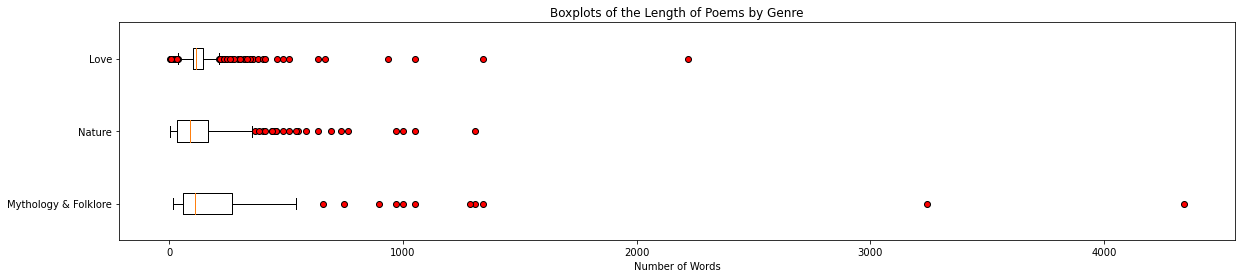

In [38]:
#Create a dictionary with genre as keys and an array of corresponding poem lengths as values
genre_dict = {}
genres = []
for genre in word_count_df["type"]:
    if genre not in genres:
        genres.append(genre)
        
for genre in genres:
    genre_df = word_count_df[word_count_df["type"] == genre]
    genre_dict[genre] = genre_df["word count"]


#Plot the boxplots
fig, ax = plt.subplots(figsize = (20,4))
ax.boxplot(genre_dict.values(), flierprops={'marker': 'o', 'markerfacecolor': 'red'}, vert=False)
ax.set_yticklabels(genre_dict.keys())
ax.set_title("Boxplots of the Length of Poems by Genre")
ax.set_xlabel("Number of Words")
plt.show()

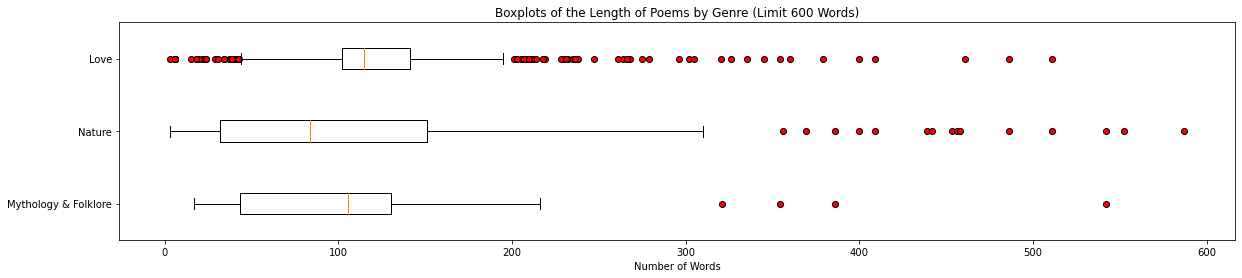

In [39]:
#Making boxplots of poems with max length of 600
genre_dict = {}
        
for genre in genres:
    genre_df = word_count_df[word_count_df["type"] == genre]
    genre_df = genre_df[genre_df["word count"] <= 600]
    genre_dict[genre] = genre_df["word count"]

fig, ax = plt.subplots(figsize = (20,4))
ax.boxplot(genre_dict.values(), flierprops={'marker': 'o', 'markerfacecolor': 'red'}, vert=False)
ax.set_yticklabels(genre_dict.keys())
ax.set_title("Boxplots of the Length of Poems by Genre (Limit 600 Words)")
ax.set_xlabel("Number of Words")
plt.show()

In [40]:
# Conclusions TBD

### N-Gram Frequencies (WIP)

In [41]:
#Dependencies for making N-grams
import nltk, re, string, collections
from nltk.util import ngrams

In [42]:
#Creates bigrams for each poem and stores them in bigrams_list. Frequency of bigrams are stored in bigrams_frequency_list.
bigrams_list = []
bigrams_frequency_list = []
for poem in split_content_series:
    poem_bigram = ngrams(poem, 1)
    bigram_frequency = collections.Counter(poem_bigram)
    bigrams_list.append(poem_bigram)
    bigrams_frequency_list.append(bigram_frequency)

In [43]:
#Print out the top 5 occuring bigrams for each poem:
#for bigram in bigrams_frequency_list:
    #print(bigram.most_common(5))